# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python and filters down to presidential general election polls only:

In [8]:

df = pd.read_csv('raw-polls.csv')\
    .query("type_simple=='Pres-G'")
df.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
470,6478,7947,40,2000,2000_Pres-G_US,US,Pres-G,Pres-G,Zogby Interactive/JZ Analytics,395,...,44.0,5.0,-1.0,11/7/00,48.31,47.79,0.51,-1.51,0.0,for Reuters | MSNBC
471,6483,7952,815,2000,2000_Pres-G_FL,FL,Pres-G,Pres-G,McLaughlin & Associates,203,...,44.0,3.0,-1.0,11/7/00,48.84,48.85,-0.01,-0.99,1.0,for Bill McCollum
472,6470,7939,820,2000,2000_Pres-G_IL,IL,Pres-G,Pres-G,KRC Research,160,...,43.0,4.0,2.0,11/7/00,54.60,42.58,12.01,-10.01,1.0,NaN
473,6473,7942,820,2000,2000_Pres-G_IL,IL,Pres-G,Pres-G,Research 2000,281,...,40.0,3.0,7.0,11/7/00,54.60,42.58,12.01,-5.01,1.0,NaN
474,6474,7943,836,2000,2000_Pres-G_NH,NH,Pres-G,Pres-G,Research 2000,281,...,41.0,1.0,3.0,11/7/00,46.80,48.07,-1.27,4.27,0.0,NaN


The cell below loads the same data in R and applies the same filter:

In [9]:
%%R

df <- read_csv('raw-polls.csv') %>% # read CSV
    filter(type_simple=='Pres-G') # filter to presidential general only

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 2,940 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1    6478      7947      40  2000 2000… US      Pres-G  Pres-G  Zogby …     395
 2    6483      7952     815  2000 2000… FL      Pres-G  Pres-G  McLaug…     203
 3    6470      7939     820  2000 2000… IL      Pres-G  Pres-G  KRC Re…     160
 4    6473      7942     820  2000 2000… IL      Pres-G  Pres-G  Resear…     281
 5    6474      7943     836  2000 2000… NH      Pres-G 

# Example Charts

Here are some very basic charts to get you started at looking at how far off these polls have been relative to the actual results of elections (`bias` variable). You will probably need to modify them significantly to get anything meaningful out of your exploratory dataviz. Think about which variables you might need to facet on the histogram (or what you might want to set the y axis to on the dotplot). 

note: This section is just example charts. You don't have to do anything here, just leave these charts as a starting point for you to copy/paste later. Scroll to the next section to get down to work!


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


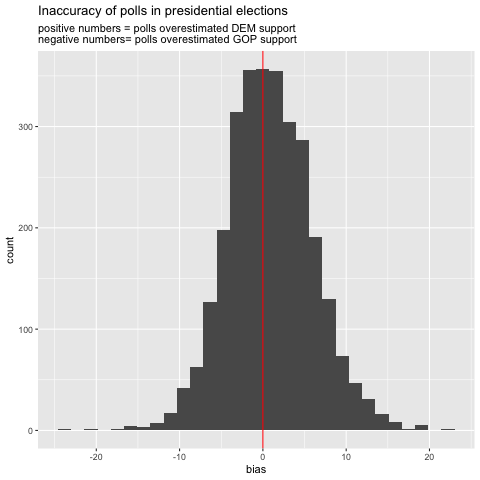

In [6]:
%%R 

ggplot(df) +
    geom_histogram(aes(x=bias)) +
    geom_vline(aes(xintercept=0), color='red') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )


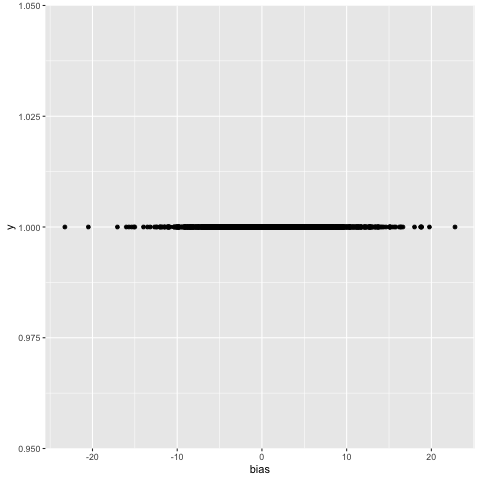

In [7]:
%%R 

ggplot(df) +
    aes(x=bias, y=1) + 
    geom_point() 

# Exploratory Data Visualization

In this section you'll make a few charts to explore the data. For each chart, write a short explanation of what you think you can and cannot conclude from the chart.

### Exploratory chart 1

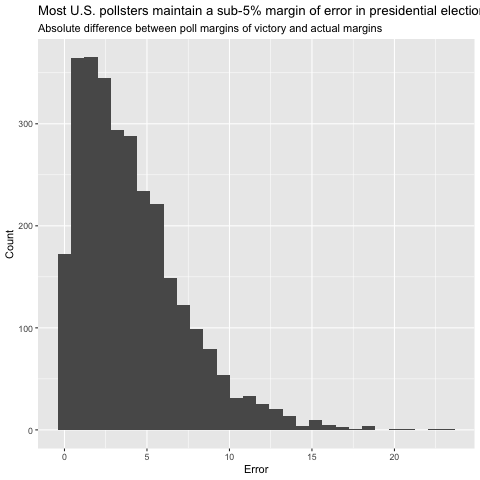

In [29]:
%%R
require('ggbeeswarm')
# 👉Chart 1
# Insert code for a ggplot chart below
ggplot(df) +
    aes(x = abs(margin_poll-margin_actual)) +
    geom_histogram(bins=30) +
    labs(x="Error", y="Count", title="Most U.S. pollsters maintain a sub-5% margin of error in presidential elections", subtitle="Absolute difference between poll margins of victory and actual margins")



👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* TKTK 
* TKTK
* TKTK

What I can't conclude based on this chart:
* TKTK 
* TKTK
* TKTK



### Exploratory chart 2

In [32]:
%%R

# 👉Chart 2
# Insert code for a ggplot chart below


NULL


👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* TKTK 
* TKTK
* TKTK

What I can't conclude based on this chart:
* TKTK 
* TKTK
* TKTK



### Exploratory chart 3

In [33]:
%%R

# 👉 Chart 2
# Insert code for a ggplot chart below


NULL


👉 Summary

_Replace this text with your summary of the chart above. Be very careful with your language. Use language that is as conclusive as you can make it, but doesn't overstep the limitaitons of what you can tell based on the data and your analysis of the data so far._

👉 Reflection

What I can conclude based on this chart:
* TKTK 
* TKTK
* TKTK

What I can't conclude based on this chart:
* TKTK 
* TKTK
* TKTK



# New Questions

Good exploratory viz generates some answers, but usually lots of new questions. 
What new questions do you have now that you've had a chance to do some exploration with the data?

👉